In [1]:
from enum import Enum


class Genero(Enum):
    MASCULINO = "M"
    FEMENINO = "F"

In [2]:
from enum import Enum


class Perfil(Enum):
    NINGUNO = None
    CONSERVADOR = "conservador"
    MODERADO = "moderado"
    ARRIESGADO = "arriesgado"

In [3]:
class Cliente:
    SMLV: int = 1000000
    EDAD_DE_RETIRO: int = 70

    def __init__(
            self,
            id: int,
            nombre: str,
            ingreso_mensual: int,
            edad: int,
            genero: Genero,
            saldo_inicial: int = 0
    ):
        self.id = id
        self.nombre = nombre
        self.edad = edad
        self.genero = genero
        self.validar_edad(edad)
        self.expectativa_vida = self.expectativa_vida()
        self.ingreso_mensual = ingreso_mensual
        self.saldo_inicial = saldo_inicial
        self.perfil = self.perfilar()

    def perfilar(self):
        # Calcular la distancia en años entre la edad de retiro y la edad actual
        distancia_edad = self.EDAD_DE_RETIRO - self.edad
        # Calcular el número de salarios mínimos legales vigentes (SMLV) que representa el ingreso mensual
        numero_smlv = self.ingreso_mensual / self.SMLV

        # Determinar el perfil de acuerdo a las condiciones establecidas
        if numero_smlv < 3 or numero_smlv > 10 or distancia_edad > 20:
            return Perfil.ARRIESGADO
        elif 3 < numero_smlv < 10 or 10 > distancia_edad < 20:
            return Perfil.MODERADO
        elif distancia_edad < 10:
            return Perfil.CONSERVADOR

    @staticmethod
    def validar_edad(edad):
        # Validar que la edad sea mayor o igual a 18 años
        if edad < 18:
            raise ValueError("Error: La edad debe ser mayor o igual a 18 años")

    def expectativa_vida(self):
        # Devolver la expectativa de vida según el género del cliente
        if self.genero.MASCULINO:
            return 78
        elif self.genero.FEMENINO:
            return 82
        else:
            raise ValueError('Género inválido')


In [4]:
from matplotlib import pyplot as plt


class ClienteRpm(Cliente):

    def __init__(self, id: int, nombre: str, ingreso_mensual: int, edad: int, genero: Genero, saldo_inicial: int = 0):
        super().__init__(id, nombre, ingreso_mensual, edad, genero, saldo_inicial)

    def senda_mesada_fee(self, tasas=None, nAcum=100, aporte=1, nDesacum=180, fee=0.02, graficar=True):
        """
        Calcula la senda de acumulación y desacumulación de acuerdo a las tasas de retorno y otros parámetros.
        Grafica los resultados si se indica.

        Args:
            tasas (list): Lista de tasas de retorno para cada etapa. Por defecto, [0.03, 0.06, 0.08].
            nAcum (int): Número de períodos de acumulación. Por defecto, 100.
            aporte (int): Monto periódico aportado en cada período. Por defecto, 1.
            nDesacum (int): Número de períodos de desacumulación. Por defecto, 180.
            fee (float): Comisión efectiva anual. Por defecto, 0.02.
            graficar (bool): Indica si se desea graficar los resultados. Por defecto, True.

        Returns:
            tuple: Tupla con dos listas: acumulacion y desacumulacion.
        """
        if tasas is None:
            tasas = [0.03, 0.06, 0.08]
        saldo = self.saldo_inicial
        acumulacion = [saldo]
        desacumulacion = []

        # Cálculo de la acumulación
        for _ in range(nAcum):
            rendimiento = saldo * tasas[0]
            comision = saldo * fee
            saldo += aporte + rendimiento - comision
            acumulacion.append(saldo)

        # Cálculo de la desacumulación
        for _ in range(nDesacum):
            rendimiento = saldo * tasas[1]
            comision = saldo * fee
            saldo -= aporte + rendimiento + comision
            desacumulacion.append(saldo)

        rendimiento = saldo * tasas[2]
        comision = saldo * fee
        saldo -= aporte + rendimiento + comision
        desacumulacion.append(saldo)

        if graficar:
            plt.plot(range(nAcum + 1), acumulacion, label='Acumulación')
            desacumulacion.append(desacumulacion[-1])
            plt.plot(range(nDesacum + 2), desacumulacion, label='Desacumulación')
            plt.xlabel('Años')
            plt.ylabel('Saldo')
            plt.legend()
            plt.show()

        return acumulacion, desacumulacion


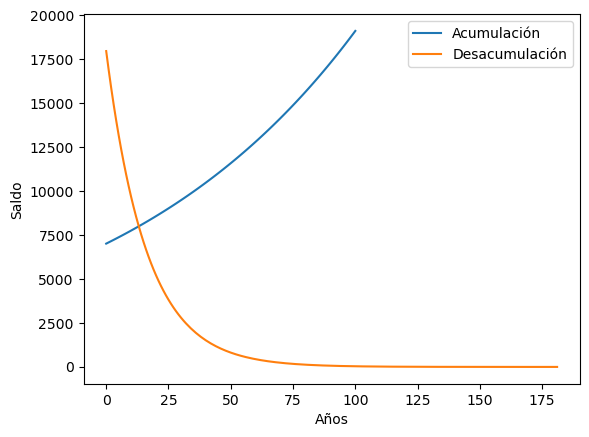

([7000,
  7071.0,
  7142.71,
  7215.1371,
  7288.288471,
  7362.17135571,
  7436.7930692671,
  7512.16099995977,
  7588.282609959368,
  7665.165436058961,
  7742.81709041955,
  7821.245261323746,
  7900.457713936983,
  7980.462291076353,
  8061.266913987116,
  8142.879583126987,
  8225.308378958258,
  8308.56146274784,
  8392.647077375319,
  8477.573548149072,
  8563.349283630563,
  8649.982776466868,
  8737.482604231536,
  8825.857430273853,
  8915.116004576592,
  9005.267164622357,
  9096.31983626858,
  9188.283034631266,
  9281.165864977578,
  9374.977523627354,
  9469.727298863629,
  9565.424571852265,
  9662.078817570788,
  9759.699605746495,
  9858.29660180396,
  9957.879567822,
  10058.45836350022,
  10160.042947135222,
  10262.643376606575,
  10366.26981037264,
  10470.932508476366,
  10576.641833561129,
  10683.40825189674,
  10791.242334415709,
  10900.154757759865,
  11010.156305337463,
  11121.257868390838,
  11233.470447074746,
  11346.805151545494,
  11461.273203060948,
 

In [5]:
cliente = ClienteRpm(id=1026265331, nombre="Jaime Cabrera", edad=18, genero=Genero.MASCULINO, saldo_inicial=7000,
                     ingreso_mensual=1000000)

cliente.senda_mesada_fee(tasas=[0.03, 0.04, 0.05])